# Financial Graphs with Spark NLP and Neo4J

![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings_JSL/Finance/neo4j/80.Financial_Graphs_Neo4j.ipynb)

# Colab Setup

In [ ]:
# Install the johnsnowlabs library to access Spark-OCR and Spark-NLP for Healthcare, Finance, and Legal.
! pip install johnsnowlabs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.2/74.2 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.6/570.6 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.4/448.4 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880769 sha256=

In [ ]:
from johnsnowlabs import nlp, finance
# After uploading your license run this to install all licensed Python Wheels and pre-download Jars the Spark Session JVM
# Make sure to restart your notebook afterwards for changes to take effect
nlp.install(force_browser=True)

<IPython.core.display.Javascript object>

127.0.0.1 - - [13/Jan/2023 13:04:53] "GET /login?code=02JfyrvqbPTxPlTvoUNHRnyN9eBUkg HTTP/1.1" 200 -


<IPython.core.display.Javascript object>

Licenses extracted successfully
📋 Stored John Snow Labs License in /root/.johnsnowlabs/licenses/license_number_0_for_Spark-Healthcare_Spark-OCR.json
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
Installing /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl to /usr/bin/python3
Running: /usr/bin/python3 -m pip install /root/.johnsnowlabs/py_installs/spark_nlp_jsl-4.2.4-py3-none-any.whl
Installed 1 products:
💊 Spark-Healthcare==4.2.4 installed! ✅ Heal the planet with NLP! 


In [ ]:
# Restart your runtime after running this cell.
!pip install -q neo4j
!pip install -q tqdm
!pip install -q --user graphistry[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 KB 17.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.8/157.8 KB 18.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 KB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.1/155.1 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

<b><h1><font color='darkred'>!!! ATTENTION !!! </font><h1><b>

<b>After running previous cell, <font color='darkred'>RESTART the COLAB RUNTIME </font> and go ahead.<b>

In [ ]:
from johnsnowlabs import nlp, finance
# Automatically load license data and start a session with all jars user has access to
spark = nlp.start()

👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.2.4, 💊Spark-Healthcare==4.2.4, running on ⚡ PySpark==3.1.2


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# if you want to start the session with custom params as in start function above
def start(SECRET):
    builder = SparkSession.builder \
        .appName("Spark NLP Licensed") \
        .master("local[*]") \
        .config("spark.driver.memory", "16G") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.kryoserializer.buffer.max", "2000M") \
        .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:"+PUBLIC_VERSION) \
        .config("spark.jars", "https://pypi.johnsnowlabs.com/"+SECRET+"/spark-nlp-jsl-"+JSL_VERSION+".jar")
      
    return builder.getOrCreate()

#spark = start(SECRET)

In [ ]:
import os
import sys
import time
import json
import neo4j
import functools 
import graphistry
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy import spatial
from neo4j import GraphDatabase
from neo4j import GraphDatabase, Driver

print('neo4j', neo4j.__version__)
print('graphistry', graphistry.__version__)

neo4j 5.2.1
graphistry 0.28.7


### Establishing a connection with Neo4j Sandbox and pygraphistry

In [ ]:
class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, parameters=None, db=None):
        
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response


In [ ]:
import neo4j
from neo4j import GraphDatabase
from neo4j import GraphDatabase, Driver


uri = 'bolt://3.93.153.8:7687'
pwd = 'thanks-pails-adherences'
user= 'neo4j'

#Create a Neo4J sandbox connection (https://neo4j.com/sandbox/)
conn = Neo4jConnection(uri=uri, user=user , pwd=pwd)

NEO4J = {
    'uri': uri, 
    'auth': ("neo4j", pwd)
}

# user,MY_PASSWORD = '',''

# create an account in graphistry for visualization and use the username and password here. (https://www.graphistry.com/)
graphistry.register(api=3,bolt=NEO4J,username=user, password=MY_PASSWORD)




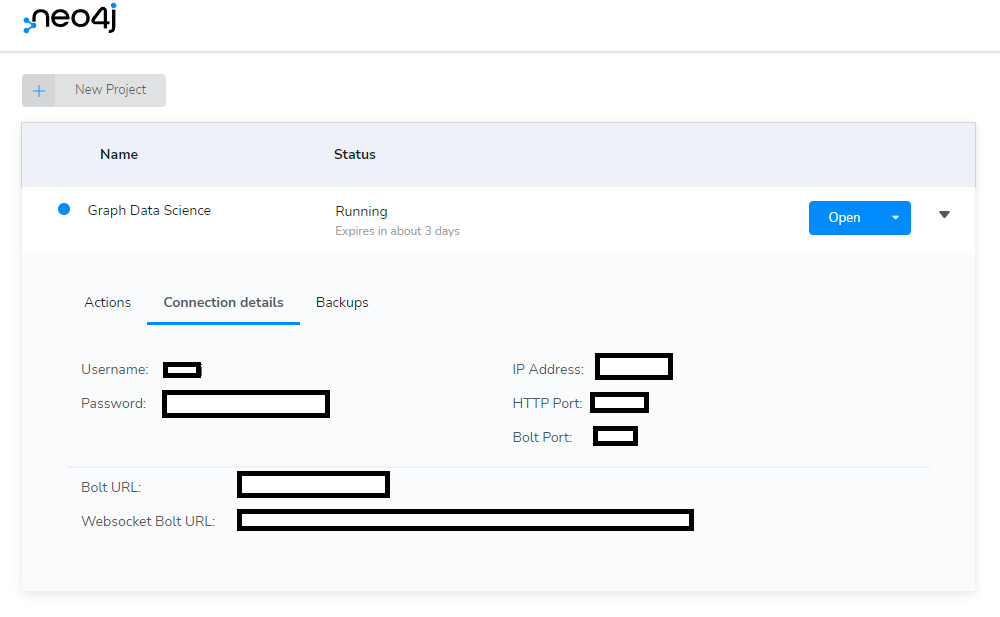

# Available graphs in ChunkMappers

In [ ]:
sec_results = [
    """Fig Publishing, Inc.""",
    """AWA Group LP""",
    """DatChat, Inc.""",
    """iConsumer Corp."""]
    

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
        .setInputCol("text")\
        .setOutputCol("document")

chunkAssembler = nlp.Doc2Chunk() \
    .setInputCols("document") \
    .setOutputCol("chunk") \
    .setIsArray(False)
#to change
CM = finance.ChunkMapperModel()\
      .pretrained("finmapper_edgar_companyname", "en", "finance/models")\
      .setInputCols(["chunk"])\
      .setOutputCol("mappings")

cm_pipeline = nlp.Pipeline(stages=[documentAssembler, chunkAssembler, CM])

finmapper_edgar_companyname download started this may take some time.
[OK!]


In [ ]:
text = [""]
test_data = spark.createDataFrame([text]).toDF("text")
fit_cm_pipeline = cm_pipeline.fit(test_data)

In [ ]:
from collections import defaultdict
# import pandas as pd

dicti = defaultdict(list)

for i in sec_results:
    kk = fit_cm_pipeline.transform(spark.createDataFrame([[i]]).toDF("text"))
    cm_res = []
    cm_res.append(kk.collect())
    for r in cm_res:
        json_dict = dict()
        json_dict['mappings'] = []
        for n in r[0]['mappings']:
            json_dict['mappings'].append([str(n.annotatorType), n.begin, n.end, str(n.result), {k:v for k,v in n.metadata.items()}])
    for i in json_dict['mappings']:
        dicti[i[4]['relation']].append(i[3])
    #     print(i[3],'--->',i[4]['relation'])  
    # print('-------------------------------')

df = pd.DataFrame(dicti)

In [ ]:
df

,name,sic,sic_code,irs_number,fiscal_year_end,state_location,state_incorporation,business_street,business_city,business_state,business_zip,business_phone,former_name,former_name_date,date,company_id
0,"Fig Publishing, Inc.",SERVICES-PREPACKAGED SOFTWARE [7372],7372,475336565,931,CA,DE,599 THIRD STREET,SAN FRANCISCO,CA,94107,(415) 689-5789,,,2017-01-23,1658966
1,AWA Group LP,INVESTMENT ADVICE [6282],6282,371785232,630,NC,DE,116 SOUTH FRANKLIN STREET,ROCKY MOUNT,NC,27804,952-446-6678,,,2017-01-23,1645148
2,"DatChat, Inc.",TELEGRAPH & OTHER MESSAGE COMMUNICATIONS [4822],4822,472502264,1231,NJ,NV,65 CHURCH STREET,NEW BRUNSWICK,NJ,08901,7323544768,"Dat Chat, Inc",20150722,2017-01-12,1648960
3,iConsumer Corp.,SERVICES-PERSONAL SERVICES [7200],7200,274286597,1231,FL,DE,19821 NW 2ND AVE SUITE 351,MIAMI GARDENS,FL,33169,8003726095,,,2017-01-18,1652350


### Generate csv for Neo4j

In [ ]:
df.to_csv('graphs.csv',index=False)

To use the CSV in Neo4j there are a couple of ways mentioned [here](https://neo4j.com/developer/kb/import-csv-locations/). I have used the one where we upload it to google sheets and then publish it to web and then use the link that is generated in here.

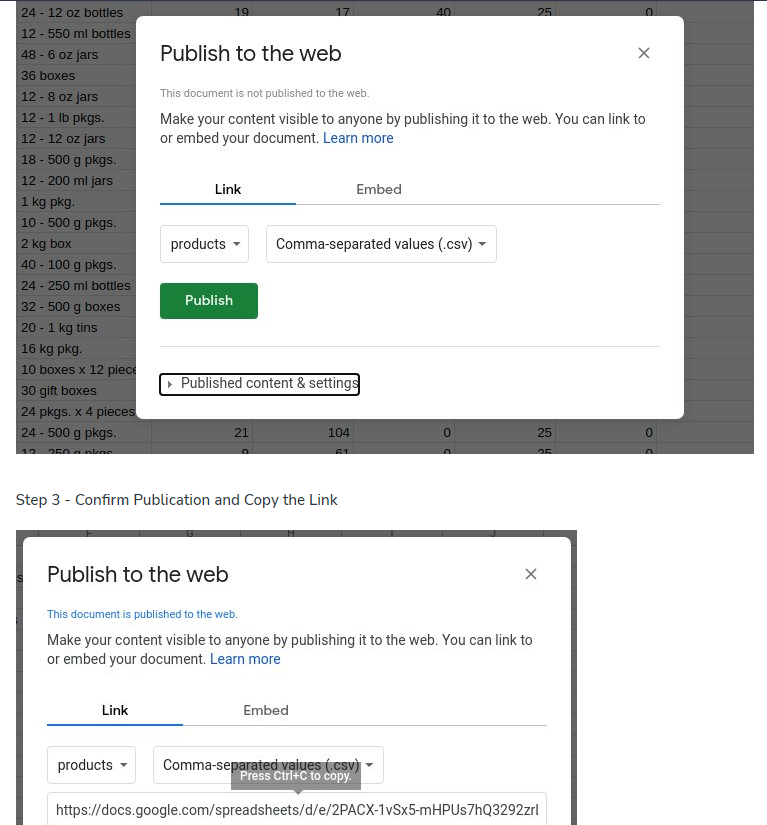

### Visualization using Neo4j and graphistry

In [ ]:
query = '''
    // create an array of maps, using the keys() function
    LOAD CSV WITH HEADERS FROM 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSSFwFkyFQgMwb_WyW8LYC0mN-7tFgt3jsiO3uq6D1atKG05w8gxSxQUytqpl1BUTbOs3ErjdO1eeWY/pub?gid=419410490&single=true&output=csv' as row
    with row.name AS company,
        [key IN keys(row) WHERE key<>'name' | {relType:key,location:row[key]}] as relTypeLocs

    WHERE row.name = 'DatChat, Inc.'

    unwind relTypeLocs AS relTypeLoc



    merge (l:locations {name:COALESCE(relTypeLoc.location,'Unknown')})



    merge (t:tokens {name:company})



    WITH l,t,



        relTypeLoc.relType AS relType



    // use apoc to create the rels



    CALL apoc.create.relationship(t,relType,{}, l) YIELD rel



    RETURN *
    '''

In [ ]:
result = conn.query(query)

result

[<Record l=<Node element_id='0' labels=frozenset({'locations'}) properties={'name': '1648960'}> rel=<Relationship element_id='33' nodes=(<Node element_id='1' labels=frozenset({'tokens'}) properties={'name': 'DatChat, Inc.'}>, <Node element_id='0' labels=frozenset({'locations'}) properties={'name': '1648960'}>) type='company_id' properties={}> relType='company_id' t=<Node element_id='1' labels=frozenset({'tokens'}) properties={'name': 'DatChat, Inc.'}>>,
 <Record l=<Node element_id='2' labels=frozenset({'locations'}) properties={'name': 'NJ'}> rel=<Relationship element_id='34' nodes=(<Node element_id='1' labels=frozenset({'tokens'}) properties={'name': 'DatChat, Inc.'}>, <Node element_id='2' labels=frozenset({'locations'}) properties={'name': 'NJ'}>) type='state_location' properties={}> relType='state_location' t=<Node element_id='1' labels=frozenset({'tokens'}) properties={'name': 'DatChat, Inc.'}>>,
 <Record l=<Node element_id='3' labels=frozenset({'locations'}) properties={'name': '4

In [ ]:
g = graphistry.cypher(query)
print(g._edges.columns)
# g.plot()

g.plot()

Index(['_bolt_relationship_id', 'type', '_bolt_start_node_id_key',
       '_bolt_end_node_id_key'],
      dtype='object')


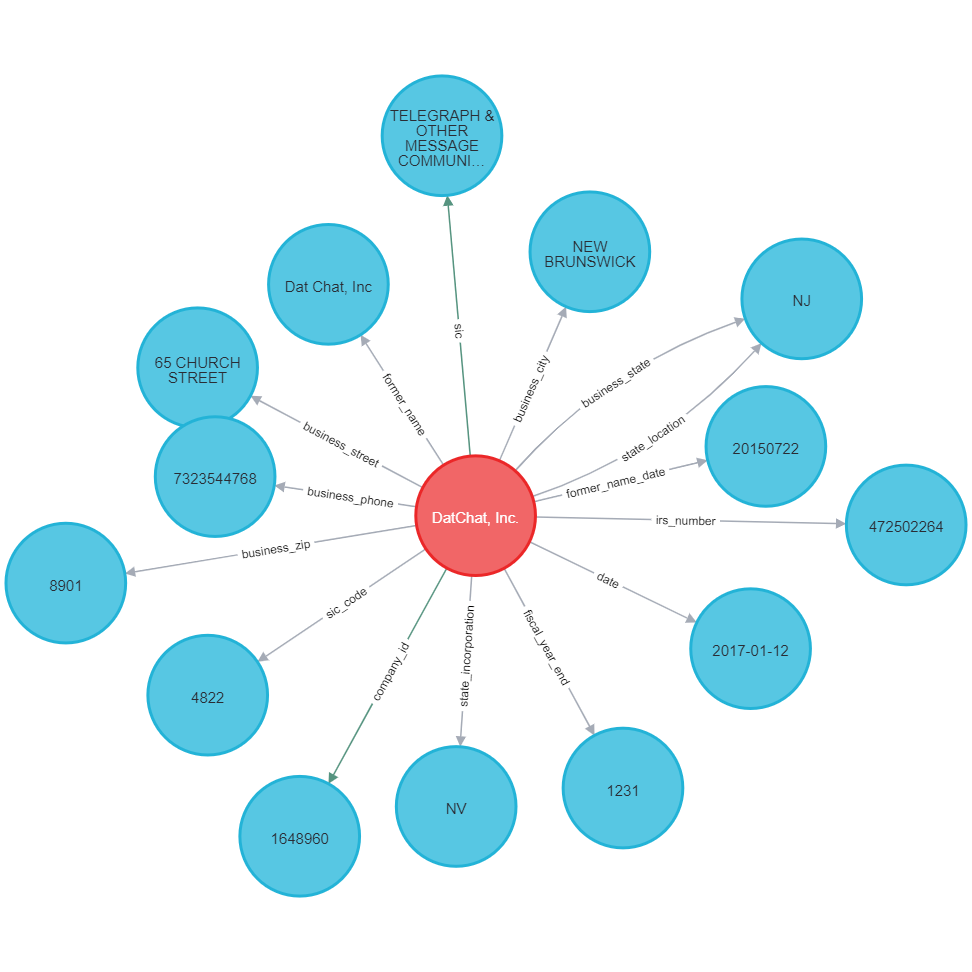

# Graph without Relation Extraction

In [ ]:
document_assembler = nlp.DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence_detector = nlp.SentenceDetector() \
    .setInputCols(["document"]) \
    .setOutputCol("sentence") \
    .setCustomBounds(["\n\n"])

tokenizer = nlp.Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

embeddings = nlp.BertEmbeddings.pretrained("bert_embeddings_finbert_pretrain_yiyanghkust","en")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")\
    .setCaseSensitive(True)\
    .setMaxSentenceLength(512)
#to change
ner_model = finance.NerModel.pretrained("finner_10k_summary","en","finance/models")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("ner")\

ner_converter = finance.NerConverterInternal()\
    .setInputCols(["sentence", "token", "ner"])\
    .setOutputCol("ner_chunk")

pipeline = nlp.Pipeline(stages=[
    document_assembler,
    sentence_detector,
    tokenizer,
    embeddings,
    ner_model,
    ner_converter   
    ])

model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

bert_embeddings_finbert_pretrain_yiyanghkust download started this may take some time.
Approximate size to download 393.2 MB
[OK!]
finner_10k_summary download started this may take some time.
[OK!]


In [ ]:
data = spark.createDataFrame([["""ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES AND EXCHANGE ACT OF 1934
For the annual period ended January 31, 2021
or
TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from________to_______
Commission File Number: 001-38856
PAGERDUTY, INC.
(Exact name of registrant as specified in its charter)
Delaware
27-2793871
(State or other jurisdiction of
incorporation or organization)
(I.R.S. Employer
Identification Number)
600 Townsend St., Suite 200, San Francisco, CA 94103
(844) 800-3889
(Address, including zip code, and telephone number, including area code, of registrant’s principal executive offices)
Securities registered pursuant to Section 12(b) of the Act:
Title of each class
Trading symbol(s)
Name of each exchange on which registered
Common Stock, $0.000005 par value,
PD
New York Stock Exchange"""]]).toDF("text")

result = model.transform(data)

In [ ]:
import pyspark.sql.functions as F

result.select(F.explode(F.arrays_zip('ner_chunk.result', 'ner_chunk.metadata')).alias("cols")) \
               .select(F.expr("cols['0']").alias("ticker"),
                       F.expr("cols['1']['entity']").alias("label")).show(50, truncate = False)

+----------------------------------------------+-----------------+
|ticker                                        |label            |
+----------------------------------------------+-----------------+
|January 31, 2021                              |FISCAL_YEAR      |
|001-38856                                     |CFN              |
|PAGERDUTY, INC                                |ORG              |
|Delaware                                      |STATE            |
|27-2793871                                    |IRS              |
|600 Townsend St., Suite 200, San Francisco, CA|ADDRESS          |
|(844) 800-3889                                |PHONE            |
|Common Stock                                  |TITLE_CLASS      |
|$0.000005                                     |TITLE_CLASS_VALUE|
|PD                                            |TICKER           |
|New York Stock Exchange                       |STOCK_EXCHANGE   |
+----------------------------------------------+--------------

In [ ]:
# from sparknlp_display import NerVisualizer

visualiser = nlp.viz.NerVisualizer()

visualiser.display(result = result.collect()[0] ,label_col = 'ner_chunk', document_col = 'document')

### Visualizing using Neo4j and graphistry

### Generate csv for Neo4j

In [ ]:
df = result.select(F.explode(F.arrays_zip('ner_chunk.result', 'ner_chunk.metadata')).alias("cols")) \
               .select(F.expr("cols['0']").alias("ticker"),
                       F.expr("cols['1']['entity']").alias("label")).toPandas()

In [ ]:
df.to_csv('graphs.csv',index=False)

TO use the CSV in Neo4j there are a couple of ways mentioned [here](https://neo4j.com/developer/kb/import-csv-locations/). I have used the one where we upload it to google sheets and then publish it to web and then use the link that is generated in here.

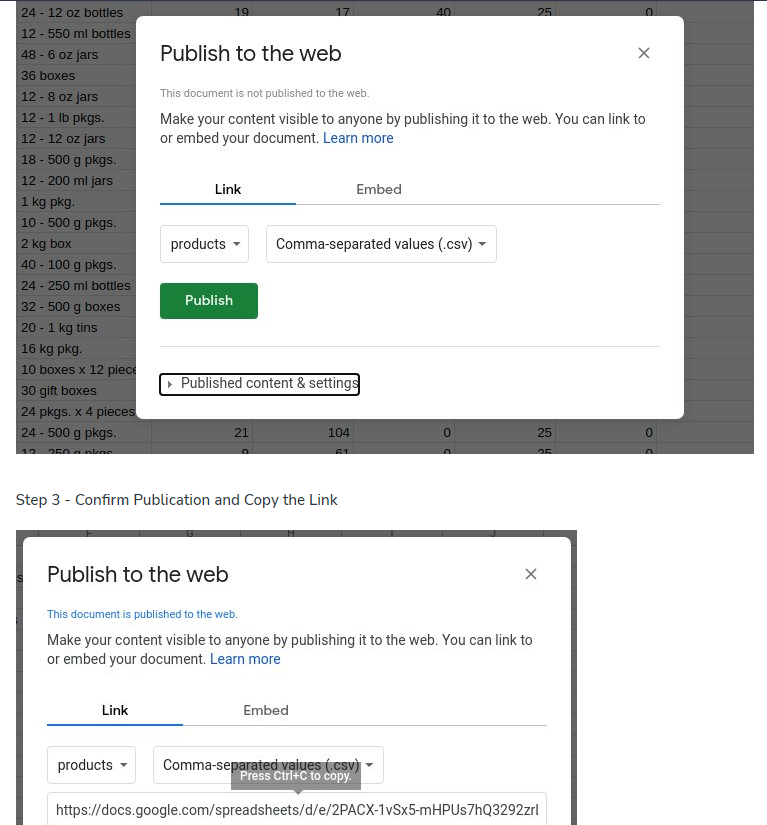

### Visualizing the Nodes and Edges

In [ ]:
(graphistry
  .edges(df, 'label','ticker')
  .nodes(df,'label')
).plot() 

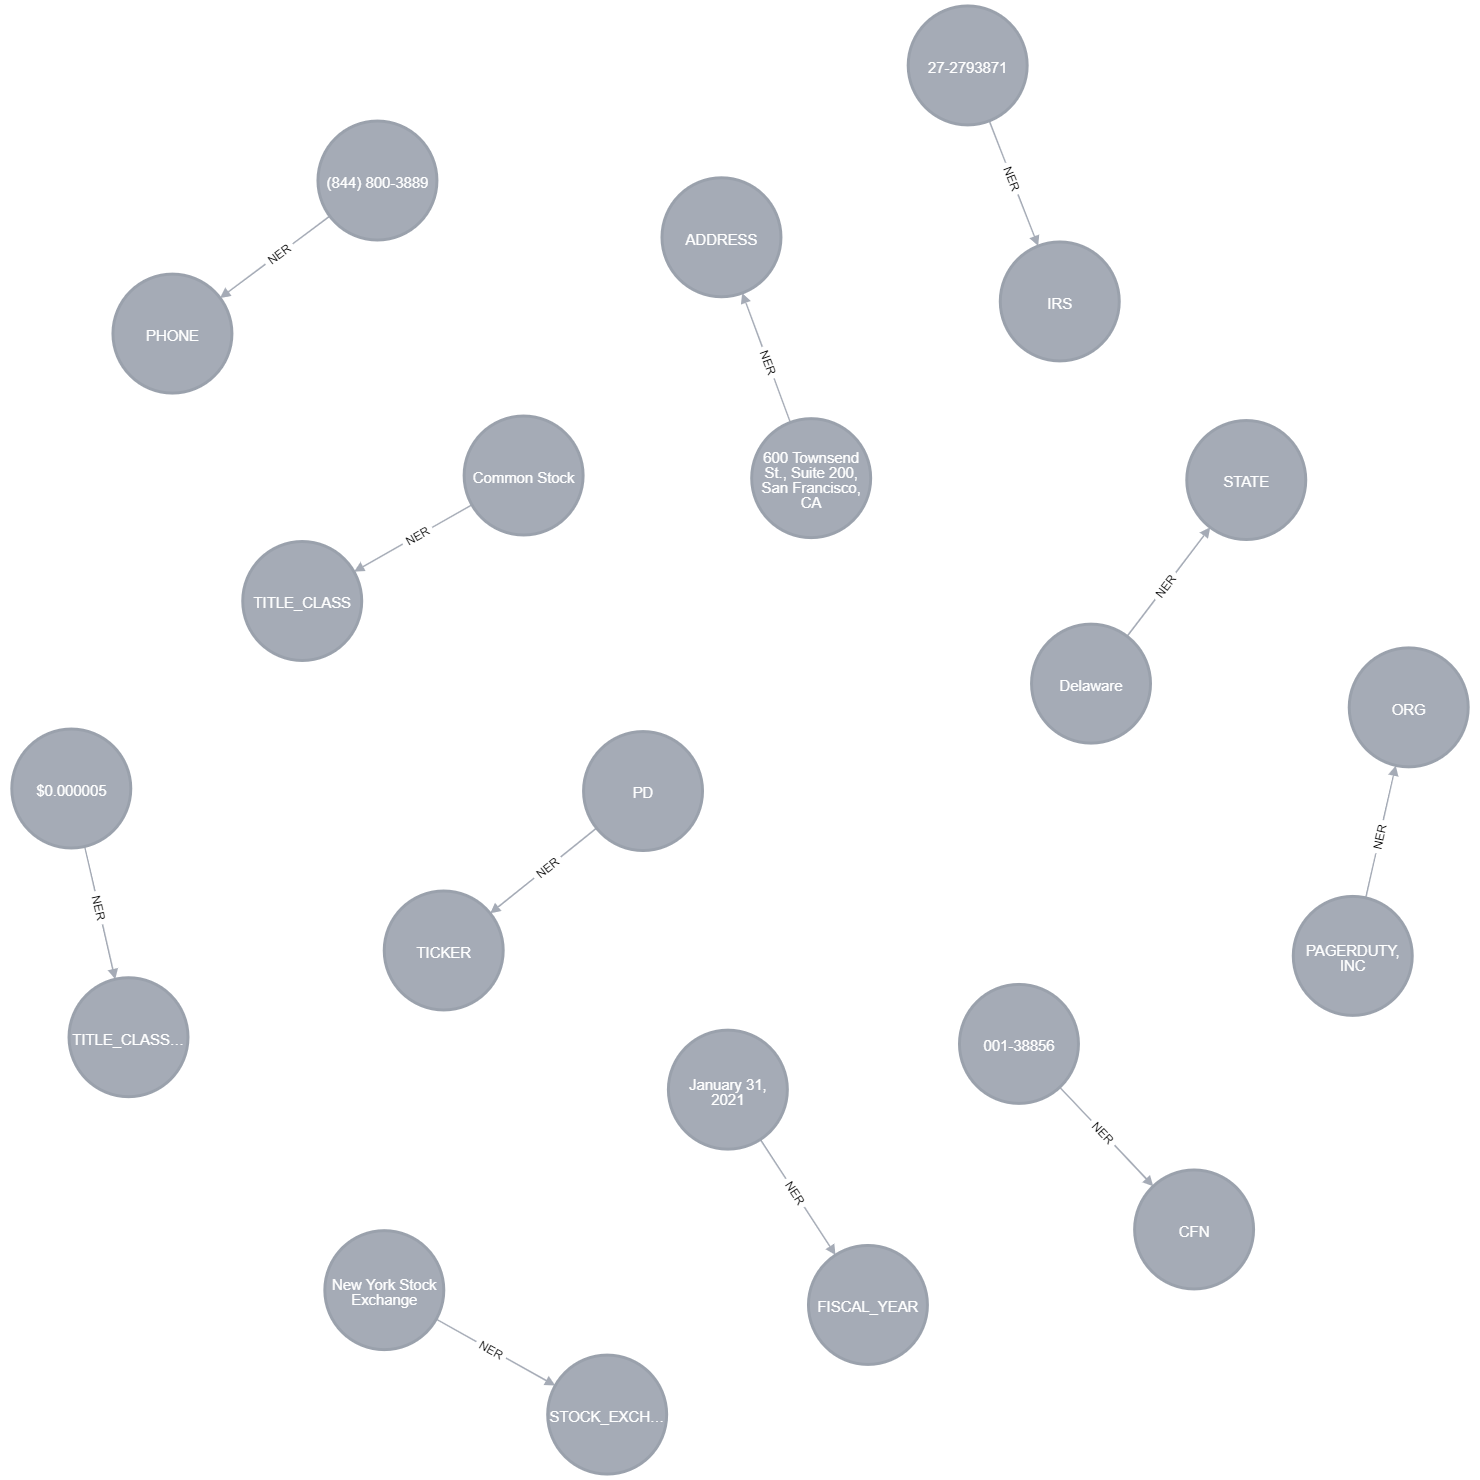

# Graphs with NER and Relation Extraction

In [ ]:
documentAssembler = nlp.DocumentAssembler()\
  .setInputCol("text")\
  .setOutputCol("document")

"""sentenceDetector = SentenceDetectorDLModel.pretrained("sentence_detector_dl","xx")\
        .setInputCols(["document"])\
        .setOutputCol("sentence")"""

tokenizer = nlp.Tokenizer()\
  .setInputCols("document")\
  .setOutputCol("token")

embeddings = nlp.BertEmbeddings.pretrained("bert_embeddings_sec_bert_base", "en") \
        .setInputCols("document", "token") \
        .setOutputCol("embeddings")\
        .setMaxSentenceLength(512)

ner_model = finance.NerModel.pretrained("finner_orgs_prods_alias","en","finance/models")\
        .setInputCols(["document", "token", "embeddings"])\
        .setOutputCol("ner")

ner_converter = finance.NerConverterInternal()\
        .setInputCols(["document","token","ner"])\
        .setOutputCol("ner_chunk")

"""
ONLY NEEDED IF YOU WANT TO FILTER RELATION PAIRS OR SYNTACTIC DISTANCE
pos_tagger = PerceptronModel()\
    .pretrained("pos_clinical", "en", "clinical/models") \
    .setInputCols(["document", "tokens"])\
    .setOutputCol("pos_tags")

dependency_parser = DependencyParserModel() \
    .pretrained("dependency_conllu", "en") \
    .setInputCols(["document", "pos_tags", "tokens"]) \
    .setOutputCol("dependencies")

# Set a filter on pairs of named entities which will be treated as relation candidates
re_filter = RENerChunksFilter()\
    .setInputCols(["ner_chunks", "dependencies"])\
    .setOutputCol("re_ner_chunks")\
#    .setMaxSyntacticDistance(7)\
#    .setRelationPairs(['PARTY-ALIAS', 'DOC-PARTY', 'DOC-EFFDATE'])
"""
reDL = finance.RelationExtractionDLModel.pretrained("finre_acquisitions_subsidiaries_md", "en", "finance/models")\
    .setPredictionThreshold(0.5)\
    .setInputCols(["ner_chunk", "document"])\
    .setOutputCol("relations")

bert_embeddings_sec_bert_base download started this may take some time.
Approximate size to download 390.4 MB
[OK!]
finner_orgs_prods_alias download started this may take some time.
[OK!]
finre_acquisitions_subsidiaries_md download started this may take some time.
[OK!]


In [ ]:
pipeline = nlp.Pipeline(stages=[
    documentAssembler,
    tokenizer,
    embeddings,
    ner_model,
    ner_converter,
    reDL
])
"""sentenceDetector,
pos_tagger,
    dependency_parser,
    re_filter,
"""

'sentenceDetector,\npos_tagger,\n    dependency_parser,\n    re_filter,\n'

In [ ]:
text=['''
On January 25, 2019, the Company acquired all outstanding stock of SignifAI, Inc. ("SignifAI"), an event intelligence company specializing in artificial intelligence and machine learning.
''']

data = spark.createDataFrame([text]).toDF("text")
model = pipeline.fit(data)
lmodel = nlp.LightPipeline(model)

In [ ]:
import pandas as pd

def get_relations_df (results, col='relations'):
  """Shows a Dataframe with the relations extracted by Spark NLP"""
  rel_pairs=[]
  for rel in results[0][col]:
      rel_pairs.append((
        rel.result, 
        rel.metadata['entity1'], 
        rel.metadata['entity1_begin'],
        rel.metadata['entity1_end'],
        rel.metadata['chunk1'], 
        rel.metadata['entity2'],
        rel.metadata['entity2_begin'],
        rel.metadata['entity2_end'],
        rel.metadata['chunk2'], 
        rel.metadata['confidence']
    ))

  rel_df = pd.DataFrame(rel_pairs, columns=['relation','entity1','entity1_begin','entity1_end','chunk1','entity2','entity2_begin','entity2_end','chunk2', 'confidence'])

  return rel_df

In [ ]:
for i in range(len(text)):
    results = lmodel.fullAnnotate(text)
    rel_df = get_relations_df (results)
    rel_df = rel_df[rel_df['relation']!='no_rel']
    print(rel_df.to_string(index=False))
    print()

       relation entity1 entity1_begin entity1_end         chunk1 entity2 entity2_begin entity2_end   chunk2 confidence
was_acquired_by     ORG            68          81 SignifAI, Inc.     ORG            26          32  Company  0.9929484
          other     ORG            26          32        Company   ALIAS            85          92 SignifAI 0.97278804
          other     ORG            68          81 SignifAI, Inc.   ALIAS            85          92 SignifAI  0.9998134



### Visualization using Neo4j and graphistry

In [ ]:
def update_data(query, rows, batch_size = 10000):
    # Function to handle the updating the Neo4j database in batch mode.
    # Especially for large datasets.
    total = 0
    batch = 0
    start = time.time()
    result = None

    while batch * batch_size < len(rows):

        res = conn.query(query, parameters={'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')})
        total += res[0]['total']
        batch += 1
        result = {"total":total, "batches":batch, "time":time.time()-start}
        print(result)

    return result

In [ ]:
def add_ners_rels(rows, batch_size=10000):
    # Adds NER nodes to the Neo4j graph as a batch job.
    query = '''
    //chunk1 NERs
    UNWIND $rows as row
    MERGE(n1:NER{name:row.chunk1}) ON CREATE SET n1.type=row.entity1

    //chunk2 NERs
    MERGE(n2:NER{name:row.chunk2}) ON CREATE SET n2.type=row.entity2

    //connect NERs
    WITH row, n1, n2
    MERGE (n1)-[:LINKS{relation:row.relation}]->(n2)
    RETURN count(*) as total  
    '''

    return update_data(query, rows, batch_size)

In [ ]:
add_ners_rels(rel_df)

{'total': 3, 'batches': 1, 'time': 0.23645687103271484}


{'total': 3, 'batches': 1, 'time': 0.23645687103271484}

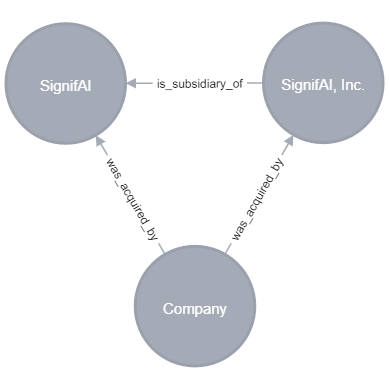

In [ ]:
rel_df.to_csv('relations.csv',index=False)

In [ ]:
# import pandas as pd
matches_df = pd.read_csv('/content/relations.csv')
matches_df.columns


Index(['relation', 'entity1', 'entity1_begin', 'entity1_end', 'chunk1',
       'entity2', 'entity2_begin', 'entity2_end', 'chunk2', 'confidence'],
      dtype='object')

In [ ]:
(graphistry
  .edges(matches_df, 'chunk1',
        'chunk2')
  .nodes(matches_df, 'relation','entity1','entity2')
).plot() 